In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

# <font color = blue> CREDIT Assignment </font>

The data given below contains the information about the loan application at the time of applying for the loan.

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

Aim:

To identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. 
 


##  Task 1: Reading the data

In [4]:
# Read the csv file using 'read_csv'. 

import os
application_data= pd.read_csv(os.path.expanduser("~/Downloads/application_data.csv"))

In [5]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Read the csv file using 'read_csv'. 

import os
previous_application= pd.read_csv(os.path.expanduser("~/Downloads/previous_application.csv"))

In [7]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import os
columns_description = pd.read_csv(os.path.expanduser("~/Downloads/columns_description.csv"),encoding= 'unicode_escape')

In [9]:
columns_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [10]:
columns_description.columns

Index(['Unnamed: 0', 'Table', 'Row', 'Description', 'Special'], dtype='object')

In [11]:
#df.loc[:, ~df.columns.str.match('Unnamed')]
columns_description =columns_description.loc[:, ~columns_description.columns.str.match('Unnamed')]

display(columns_description)

,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
155,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


- ###  Subtask 1: Inspect the Dataframes

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [12]:
application_data.shape

(307511, 122)

In [13]:
application_data.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [14]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [15]:
previous_application.shape

(1670214, 37)

In [16]:
previous_application.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [17]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(application_data.dtypes)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(previous_application.dtypes)

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### TASK 2: Data Cleaning of Previous_application dataset.

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [20]:
(previous_application.isnull().sum()/len(previous_application)*100).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

### Removing columns with missing values more than 50%¶


In [21]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

In [22]:
previous_application['AMT_ANNUITY'].isnull().sum()

372235

In [23]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

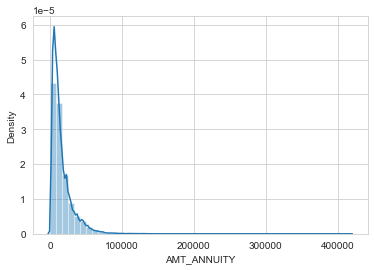

In [24]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_ANNUITY']) 
plt.show()

In [25]:
#We can Fill NA with 15955 i.e. Median for this field
previous_application['AMT_ANNUITY'].fillna(value=11255,inplace=True)

In [26]:
previous_application['AMT_GOODS_PRICE'].isnull().sum()

385515

In [27]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

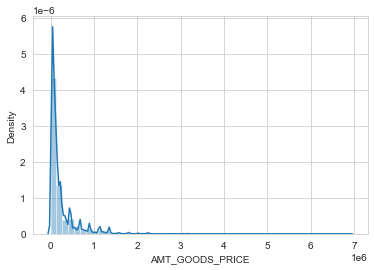

In [28]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_GOODS_PRICE']) 
plt.show()

In [29]:
## We can Fill NA with 112320 i.e. Median for this field
previous_application['AMT_GOODS_PRICE'].fillna(value=112320,inplace=True)

In [30]:
previous_application['NAME_TYPE_SUITE'].isnull().sum()

820405

In [31]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [32]:
## We can Fill NA with Unaccompanied i.e. Mode for this field
previous_application['NAME_TYPE_SUITE'].fillna(value='Unaccompanied' ,inplace=True)

In [33]:
previous_application['CNT_PAYMENT'].isnull().sum()

372230

In [34]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

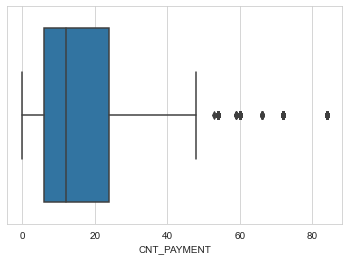

In [35]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['CNT_PAYMENT']) 
plt.show()

In [36]:
## We can Fill NA with 12 i.e. Median for this field
previous_application['CNT_PAYMENT'].fillna(value=12 ,inplace=True)

In [37]:
previous_application['DAYS_FIRST_DRAWING'].isnull().sum()

673065

In [38]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [39]:
## We can Fill NA with 365243 i.e. Median for this field
previous_application['DAYS_FIRST_DRAWING'].fillna(value=365243 ,inplace=True)

In [40]:
previous_application['DAYS_FIRST_DUE'].isnull().sum()

673065

In [41]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [42]:
## We can Fill NA with  -831 i.e. Median for this field
previous_application['DAYS_FIRST_DUE'].fillna(value=-831,inplace=True)

In [43]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()

673065

In [44]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

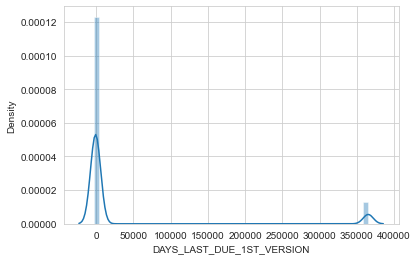

In [45]:
sns.distplot(previous_application['DAYS_LAST_DUE_1ST_VERSION']) 
plt.show()

In [46]:
##We can Fill NA with -361 i.e. Median for this field
previous_application['DAYS_LAST_DUE_1ST_VERSION'].fillna(value=-361,inplace=True)

In [47]:
previous_application['DAYS_LAST_DUE'].isnull().sum()

673065

In [48]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

In [49]:
## We can Fill NA with -537 i.e. Median for this field

previous_application['DAYS_LAST_DUE'].fillna(value=-537,inplace=True)

In [50]:
previous_application['DAYS_TERMINATION'].isnull().sum()

673065

In [51]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [52]:
## We can Fill NA with -499 i.e. Median for this field
previous_application['DAYS_TERMINATION'].fillna(value=-499,inplace=True)

In [53]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

673065

In [54]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [55]:
## We can Fill NA with 0 i.e. Mode for this field
previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(value=0,inplace=True)

In [56]:
previous_application['AMT_CREDIT'].isnull().sum()

1

In [57]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [58]:
## We can Fill NA with 80541 i.e. Median for this field

previous_application['AMT_CREDIT'].fillna(value=80541,inplace=True)

In [59]:
previous_application['PRODUCT_COMBINATION'].isnull().sum()

346

In [60]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [61]:
## We can Fill NA with Cash i.e. Mode for this field

previous_application['PRODUCT_COMBINATION'].fillna(value='Cash',inplace=True)

In [62]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

### Observations on Categorical data:

In [63]:
print(previous_application['NAME_YIELD_GROUP'].unique())
print('----------------------------------------------------------------')
print(previous_application['NAME_SELLER_INDUSTRY'].unique())
print('----------------------------------------------------------------')
print(previous_application['NAME_CLIENT_TYPE'].unique())
print('----------------------------------------------------------------')
print(previous_application['NAME_PRODUCT_TYPE'].unique())
print('----------------------------------------------------------------')
print(previous_application['NAME_PORTFOLIO'].unique())
print('----------------------------------------------------------------')
print(previous_application['NAME_GOODS_CATEGORY'].unique())
print('----------------------------------------------------------------')
print(previous_application['NAME_CLIENT_TYPE'].unique())
print('----------------------------------------------------------------')
print(previous_application['NAME_PAYMENT_TYPE'].unique())
print('----------------------------------------------------------------')
print(previous_application['CODE_REJECT_REASON'].unique())
print('----------------------------------------------------------------')
print(previous_application['NAME_CASH_LOAN_PURPOSE'].unique())


['middle' 'low_action' 'high' 'low_normal' 'XNA']
----------------------------------------------------------------
['Connectivity' 'XNA' 'Consumer electronics' 'Industry' 'Clothing'
 'Furniture' 'Construction' 'Jewelry' 'Auto technology' 'MLM partners'
 'Tourism']
----------------------------------------------------------------
['Repeater' 'New' 'Refreshed' 'XNA']
----------------------------------------------------------------
['XNA' 'x-sell' 'walk-in']
----------------------------------------------------------------
['POS' 'Cash' 'XNA' 'Cards' 'Cars']
----------------------------------------------------------------
['Mobile' 'XNA' 'Consumer Electronics' 'Construction Materials'
 'Auto Accessories' 'Photo / Cinema Equipment' 'Computers' 'Audio/Video'
 'Medicine' 'Clothing and Accessories' 'Furniture' 'Sport and Leisure'
 'Homewares' 'Gardening' 'Jewelry' 'Vehicles' 'Education'
 'Medical Supplies' 'Other' 'Direct Sales' 'Office Appliances' 'Fitness'
 'Tourism' 'Insurance' 'Additional S

###  We observed, The Previous_Dataset has some XNA values(null values)(which are null values)in some coulmns, caliculate the percentage of then .

In [64]:
print("NAME_YIELD_GROUP:\n",previous_application['NAME_YIELD_GROUP'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("NAME_SELLER_INDUSTRY:\n",previous_application['NAME_SELLER_INDUSTRY'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("NAME_CLIENT_TYPE:\n",previous_application['NAME_CLIENT_TYPE'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("NAME_PRODUCT_TYPE:\n",previous_application['NAME_PRODUCT_TYPE'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("NAME_PORTFOLIO:\n",previous_application['NAME_PORTFOLIO'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("NAME_GOODS_CATEGORY:\n",previous_application['NAME_GOODS_CATEGORY'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("NAME_CLIENT_TYPE:\n",previous_application['NAME_CLIENT_TYPE'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("NAME_PAYMENT_TYPE:\n",previous_application['NAME_PAYMENT_TYPE'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("CODE_REJECT_REASON:\n",previous_application['CODE_REJECT_REASON'].value_counts(normalize=True) * 100)
print('----------------------------------------------------------------')
print("NAME_CASH_LOAN_PURPOSE:\n",previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True) * 100)

NAME_YIELD_GROUP:
 XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64
----------------------------------------------------------------
NAME_SELLER_INDUSTRY:
 XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64
----------------------------------------------------------------
NAME_CLIENT_TYPE:
 Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64
----------------------------------------------------------------
NAME_PRODUCT_TYPE:
 XNA        63.684

 For now, we are not dropping them.

### TASK 3: Data Cleaning of application_data dataset.

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [65]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [66]:
## calculate the percentage of missing values.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(application_data.isnull().sum().sort_values(ascending=False)/len(application_data)*100)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [67]:
# Cleaning the missing data

# Removing the null values columns having more than and near to 50% missing values.

application_data=application_data.drop(['EMERGENCYSTATE_MODE','TOTALAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI',
                                       'FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','HOUSETYPE_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','ENTRANCES_AVG','ENTRANCES_MODE',
                                       'ENTRANCES_MEDI','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE',              
                                       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',             
                                        'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE' ,'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',                  
                                       'FLOORSMIN_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_AVG','YEARS_BUILD_MODE','OWN_CAR_AGE' , 'LANDAREA_MODE','LANDAREA_AVG' ,'LANDAREA_MEDI','BASEMENTAREA_MEDI' ,
                                        'BASEMENTAREA_AVG' ,'BASEMENTAREA_MODE','EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE','ELEVATORS_MODE','ELEVATORS_AVG','ELEVATORS_MEDI','WALLSMATERIAL_MODE', 
                                       ],axis=1)


In [68]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(application_data.isnull().sum().sort_values(ascending=False)/len(application_data)*100)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

In [69]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [70]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [71]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [72]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [73]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [74]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [75]:
## Replacing Credit Bureau Enquiries null values with their median values.
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=0,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=0,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=0,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=0,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=0,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=0,inplace=True)

In [76]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [77]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [78]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [79]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [80]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


### We can Fill NA with 0 i.e. Median for these fields

In [81]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)

In [82]:
application_data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [83]:
application_data['AMT_ANNUITY'].describe()


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [84]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY  : 12


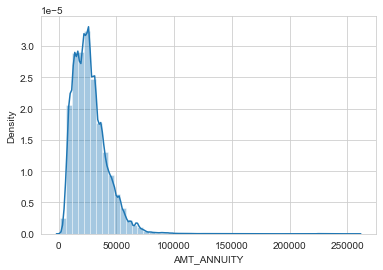

In [85]:
sns.distplot(application_data['AMT_ANNUITY']) 
plt.show()

In [86]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [87]:
print("AMT_GOODS_PRICE  :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE  : 278


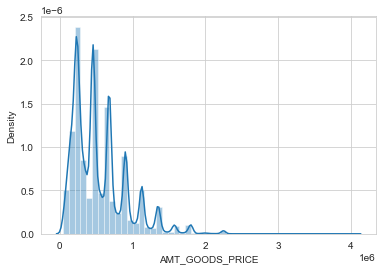

In [88]:
sns.distplot(application_data['AMT_GOODS_PRICE']) 
plt.show()

We can Fill NA with Meadian values for both AMT_GOODS_PRICE,AMT_ANNUITY,fields as we observe that both are right skewed graph.

In [89]:
application_data['AMT_GOODS_PRICE'].fillna(value=45000,inplace=True)
application_data['AMT_ANNUITY'].fillna(value=24903,inplace=True)

In [90]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [91]:
#We can Fill NA with "Unaccompanied" i.e. Mode for this field
application_data['NAME_TYPE_SUITE'].fillna(value="Unaccompanied",inplace=True)


In [92]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [93]:
#We can Fill NA with 2 i.e. Median for this field.
application_data['CNT_FAM_MEMBERS'].fillna(value=2,inplace=True)

In [94]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [95]:
#We can Fill NA with 0 i.e. Mode for this field.
application_data['DAYS_LAST_PHONE_CHANGE'].fillna(value=0,inplace=True)

In [96]:
#Converting negative values to absolute values.
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [97]:
application_data['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [98]:
#We can Fill NA with 'Laborers' i.e. Mode for this field.
application_data['OCCUPATION_TYPE'].fillna(value='Laborers',inplace=True)

In [99]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [100]:
## Replacing External Source 3 Data with Median
application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].median(),inplace=True)

In [101]:
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [102]:
print("EXT_SOURCE_2' :" ,application_data['EXT_SOURCE_2'].isnull().sum())

EXT_SOURCE_2' : 660


In [103]:
## Replacing External Source 2 Data with Median
application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].median(),inplace=True)

In [104]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(application_data.isnull().sum().sort_values(ascending=False)/len(application_data)*100)

AMT_REQ_CREDIT_BUREAU_YEAR     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
DAYS_EMPLOYED                  0.0
DAYS_BIRTH                     0.0
REGION_POPULATION_RELATIVE     0.0
AMT_INCOME_TOTAL               0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_CREDIT                     0.0
NAME_HOUSING_TYPE   

###  separating numerical and categorical columns

In [105]:

numerical= application_data.select_dtypes(include =['float64'])

In [106]:
numerical.dtypes

AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
REGION_POPULATION_RELATIVE    float64
DAYS_REGISTRATION             float64
CNT_FAM_MEMBERS               float64
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

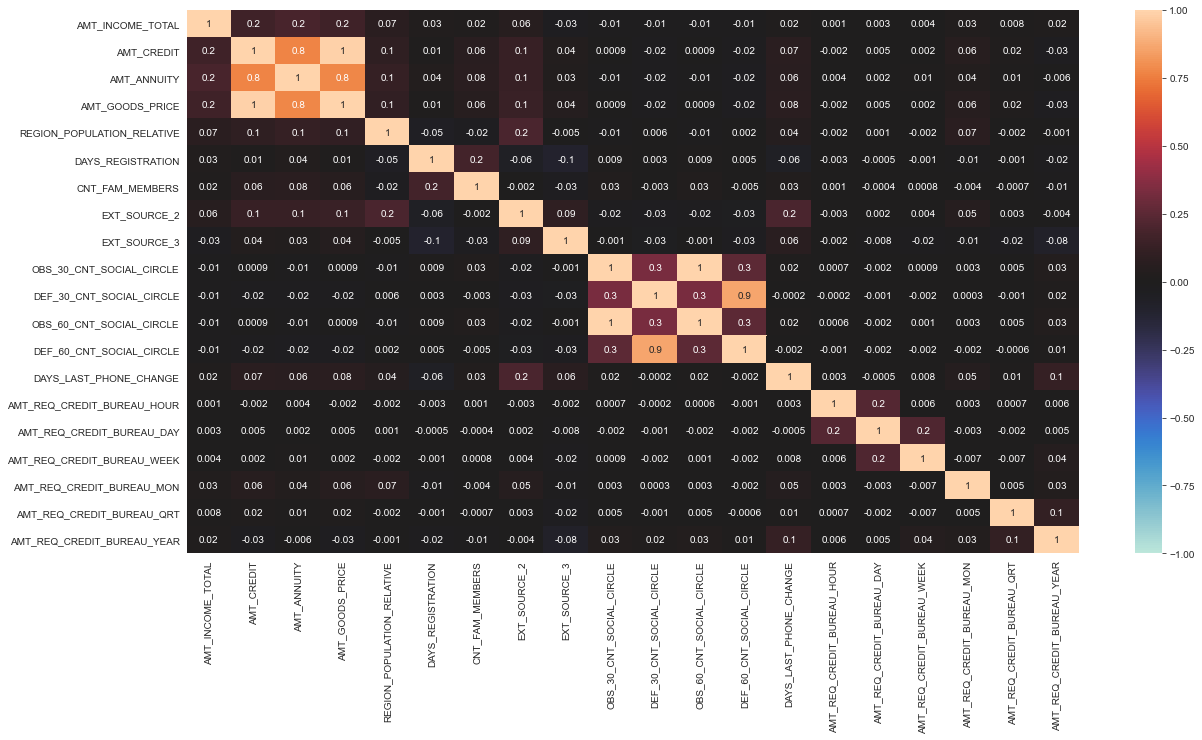

In [107]:
plt.figure(figsize=(20,10))
corrMatrix = numerical.corr()
sns.heatmap(corrMatrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0)
plt.show()

In [108]:
corrMatrix.round(2)


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.00,0.16,0.19,0.16,0.07,0.03,0.02,0.06,-0.03,-0.01,-0.01,-0.01,-0.01,0.02,0.00,0.00,0.00,0.03,0.01,0.02
AMT_CREDIT,0.16,1.00,0.77,0.99,0.10,0.01,0.06,0.13,0.04,0.00,-0.02,0.00,-0.02,0.07,-0.00,0.01,0.00,0.06,0.02,-0.03
AMT_ANNUITY,0.19,0.77,1.00,0.78,0.12,0.04,0.08,0.13,0.03,-0.01,-0.02,-0.01,-0.02,0.06,0.00,0.00,0.01,0.04,0.01,-0.01
AMT_GOODS_PRICE,0.16,0.99,0.78,1.00,0.10,0.01,0.06,0.14,0.04,0.00,-0.02,0.00,-0.02,0.08,-0.00,0.01,0.00,0.06,0.02,-0.03
REGION_POPULATION_RELATIVE,0.07,0.10,0.12,0.10,1.00,-0.05,-0.02,0.20,-0.00,-0.01,0.01,-0.01,0.00,0.04,-0.00,0.00,-0.00,0.07,-0.00,-0.00
DAYS_REGISTRATION,0.03,0.01,0.04,0.01,-0.05,1.00,0.17,-0.06,-0.10,0.01,0.00,0.01,0.00,-0.06,-0.00,-0.00,-0.00,-0.01,-0.00,-0.02
CNT_FAM_MEMBERS,0.02,0.06,0.08,0.06,-0.02,0.17,1.00,-0.00,-0.03,0.03,-0.00,0.03,-0.00,0.03,0.00,-0.00,0.00,-0.00,-0.00,-0.01
EXT_SOURCE_2,0.06,0.13,0.13,0.14,0.20,-0.06,-0.00,1.00,0.09,-0.02,-0.03,-0.02,-0.03,0.20,-0.00,0.00,0.00,0.05,0.00,-0.00
EXT_SOURCE_3,-0.03,0.04,0.03,0.04,-0.00,-0.10,-0.03,0.09,1.00,-0.00,-0.03,-0.00,-0.03,0.06,-0.00,-0.01,-0.02,-0.01,-0.02,-0.08
OBS_30_CNT_SOCIAL_CIRCLE,-0.01,0.00,-0.01,0.00,-0.01,0.01,0.03,-0.02,-0.00,1.00,0.33,1.00,0.25,0.02,0.00,-0.00,0.00,0.00,0.01,0.03


In [109]:
application_data.shape

(307511, 73)

In [110]:
categorical=application_data.select_dtypes(include ='object')
categorical.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [111]:
categorical.ORGANIZATION_TYPE.unique()


array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [112]:
categorical.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [113]:
categorical.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [114]:
categorical.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

In [115]:
categorical.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [116]:
categorical.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [117]:
categorical.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [118]:
categorical.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [119]:
categorical.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [120]:
categorical.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [121]:
categorical.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

### In Categorical columns,ORGANIZATION_TYPE and CODE_GENDER, we observed two columns have XNA values.

### Treating 'XNA' Values:

In [122]:
(categorical.ORGANIZATION_TYPE.value_counts()/len(categorical.ORGANIZATION_TYPE)*100).round(2)

Business Entity Type 3    22.11
XNA                       18.01
Self-employed             12.49
Other                      5.43
Medicine                   3.64
Business Entity Type 2     3.43
Government                 3.38
School                     2.89
Trade: type 7              2.55
Kindergarten               2.24
Construction               2.19
Business Entity Type 1     1.95
Transport: type 4          1.76
Trade: type 3              1.14
Industry: type 9           1.10
Industry: type 3           1.07
Security                   1.06
Housing                    0.96
Industry: type 11          0.88
Military                   0.86
Bank                       0.82
Agriculture                0.80
Police                     0.76
Transport: type 2          0.72
Postal                     0.70
Security Ministries        0.64
Trade: type 2              0.62
Restaurant                 0.59
Services                   0.51
University                 0.43
Industry: type 7           0.43
Transpor

### so, here we have 18% of XNA values in the ORGANIZATION_TYPE column we can drop those rows.

In [123]:
# Dropping the rows which have 'XNA' values in the organization type column
application_data=application_data.drop(application_data.loc[application_data['ORGANIZATION_TYPE']=='XNA'].index)

In [124]:
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [125]:
application_data.CODE_GENDER.value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

### here we can replace the XNA values with 'F' because the count of 'F' is more than 'M'.

In [126]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data['CODE_GENDER'].value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

### Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [127]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [128]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

### Distribution of TARGET VARIABLE



TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)

In [129]:
application_data['TARGET'].value_counts()/len(application_data) *100

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

<Figure size 1440x720 with 0 Axes>

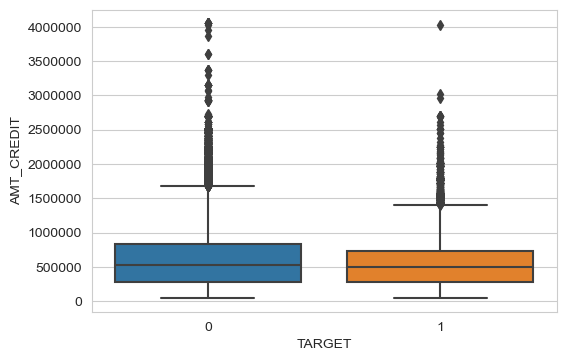

In [130]:
# calculating outliers

plt.figure(figsize=(20,10))
plt.figure(dpi=100)

sns.boxplot(y='AMT_CREDIT', x='TARGET', data= application_data)
              
                 
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0.5, 1.0, 'Count of target variable')

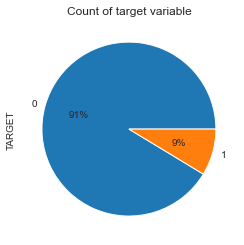

In [131]:
#Plot a pie chart
application_data['TARGET'].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Count of target variable")  

### Observation: 8% out of total client population have difficulties in repaying loans.

## Imbalance percentage

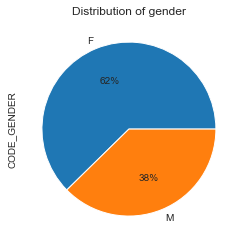

In [132]:
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Distribution of gender")
plt.show()

Observation: It shows the data is not Balanced.

### Distribution of Contract type by gender

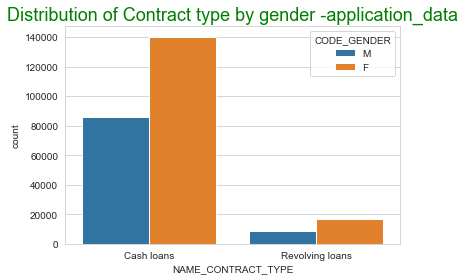

In [133]:
# Distribution of Contract type by gender

sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=application_data)
plt.title("Distribution of Contract type by gender -application_data",color='g',fontsize=18)
plt.show()

### Point to infer from the graph

* Cash loans is always prefered over Revolving loans by both genders.
* Females are taking more cash loans compared to male.

## Distribution of Organization type for target

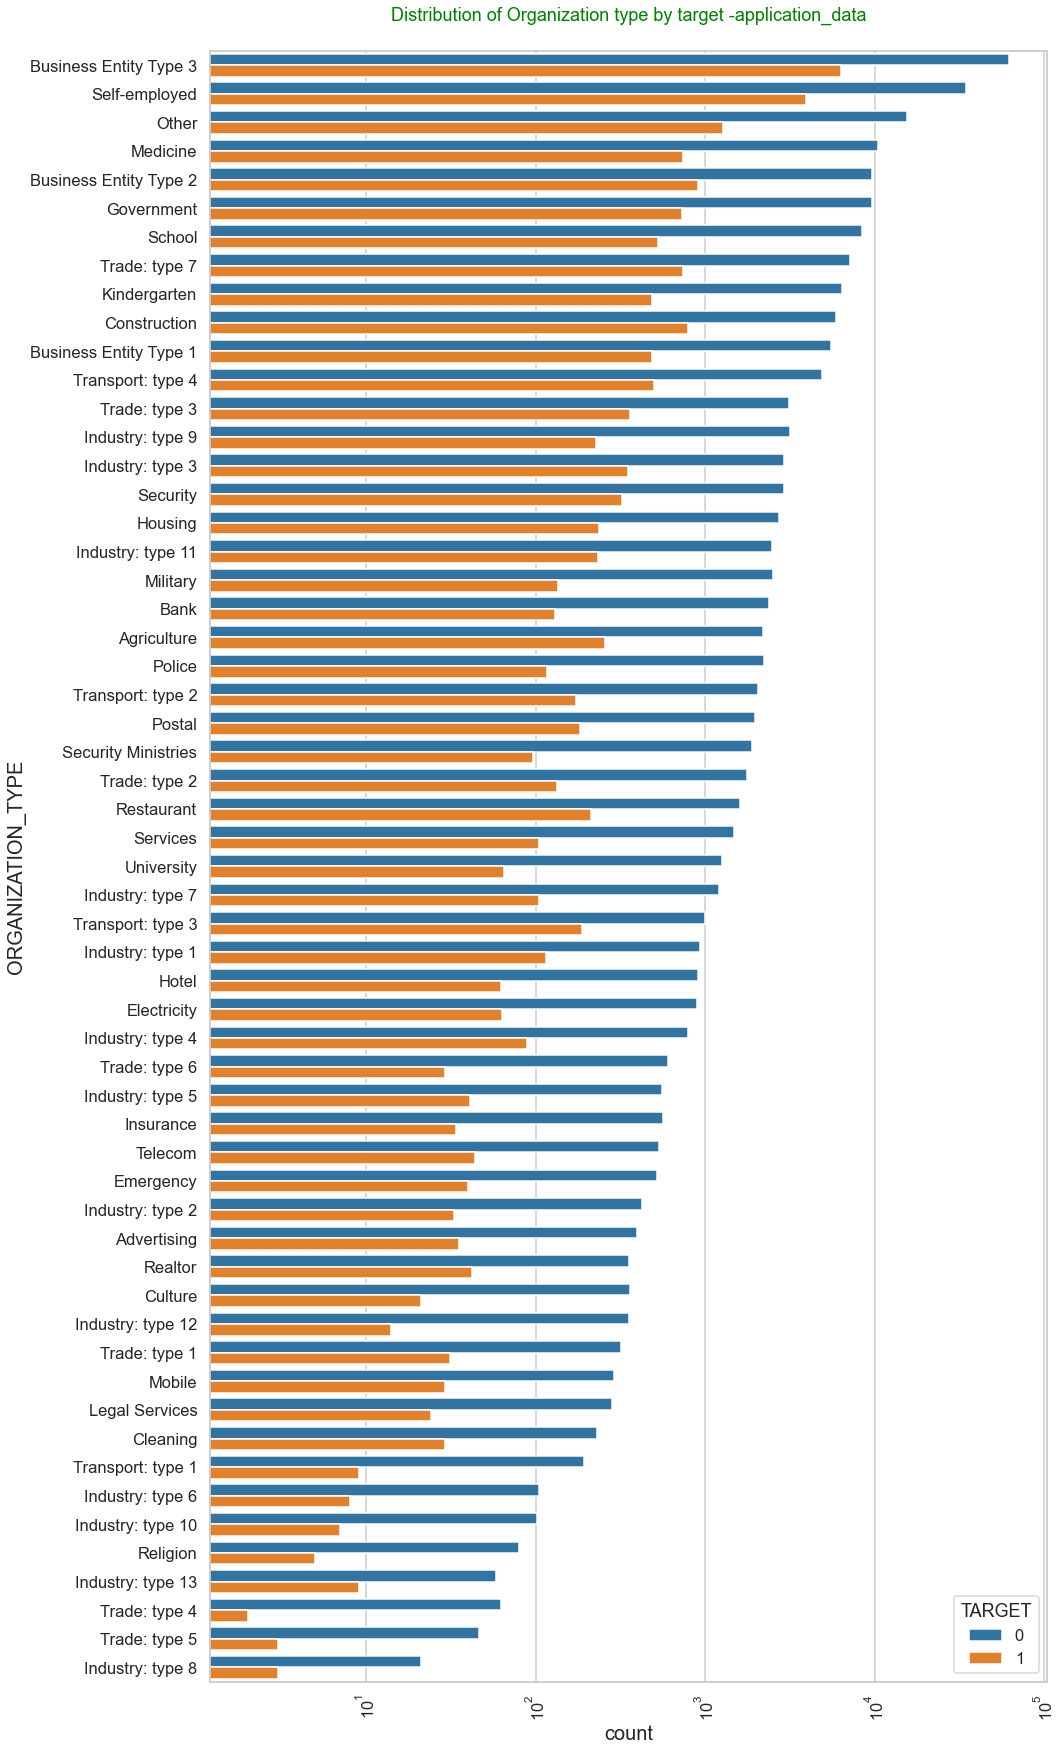

In [134]:
## Distribution of Organization type for target
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title("Distribution of Organization type by target -application_data",color='g',fontsize=18)

sns.countplot(data=application_data,y='ORGANIZATION_TYPE',hue="TARGET",order=application_data['ORGANIZATION_TYPE'].value_counts().index)


plt.show()

### Points to be concluded from the above graph.
TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)

* highest clients with payment difficulties and All other cases when the payment is paid on time both are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other'.

* The organization type ‘Trade:type 4’ has Less clients with payment difficulties.

* The organization type ‘Industry:type 8’ has Less clients are paid the payment on time.

### Distribution of Number of children and family members of client by repayment status.¶
CNT_CHILDREN - Number of children the client has.

CNT_FAM_MEMBERS - How many family members does client have.

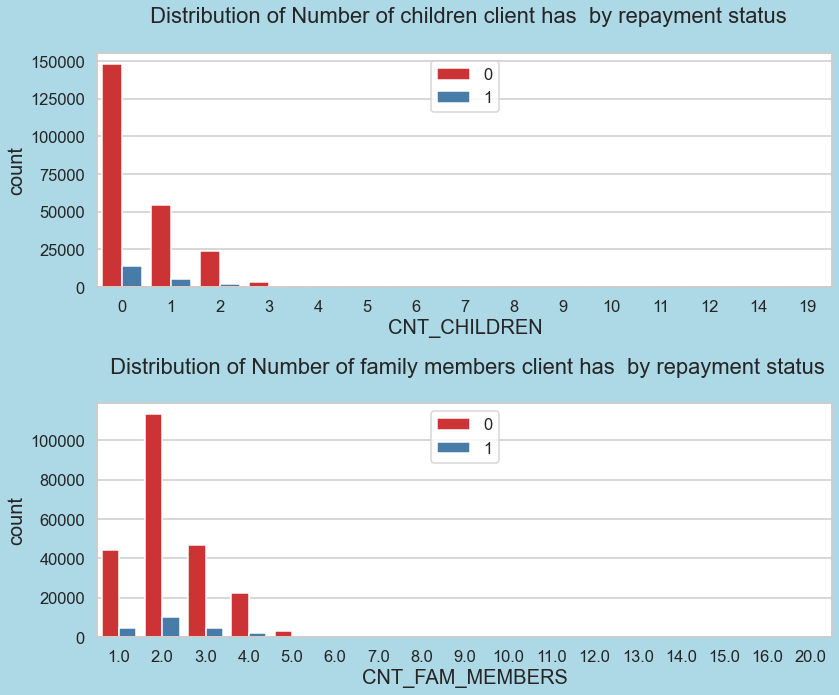

In [135]:
## Distribution of Number of children and family members of client by repayment status

fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(application_data["CNT_CHILDREN"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(application_data["CNT_FAM_MEMBERS"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")
plt.tight_layout()

### Obsevations:
    
* Children number of children increases the client with payment difficulties are less.
* count of family members are more then the clients with pament difficulties are less.

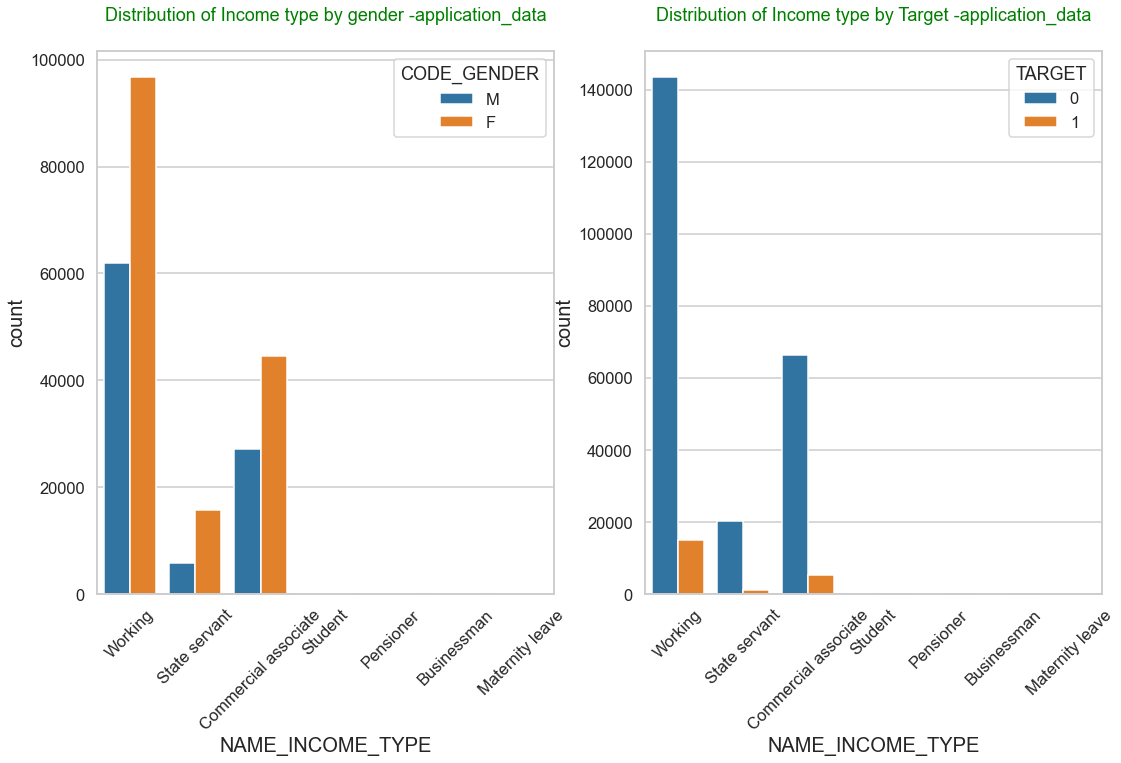

<Figure size 432x288 with 0 Axes>

In [136]:
# Plotting for Income type

fig = plt.figure(figsize=(18,10))
plt.subplot(121)
sns.countplot("NAME_INCOME_TYPE",hue="CODE_GENDER",data=application_data)
plt.title("Distribution of Income type by gender -application_data",color='g',fontsize=18)
plt.xticks(rotation=45)
plt.subplot(122)
sns.countplot('NAME_INCOME_TYPE',hue='TARGET',data=application_data)
plt.title("Distribution of Income type by Target -application_data",color='g',fontsize=18)
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

Observaions:
    
* The client with payment difficulties are very less in working Income_type compared with all other cases.
* in commercial associates income_type also has very less clients with payment difficulties.

### Dividing the dataset into two dataset

In [137]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0=application_data.loc[application_data["TARGET"]==0]
target1=application_data.loc[application_data["TARGET"]==1]


In [138]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

len(target0)/len(target1)

10.547378062743302

#### The Imbalance ratio is 10.55

**Univariate analysis for categories**

**Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)**

In [139]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = application_data, x= col, order=df[col].value_counts().index,hue = hue) 
        
    plt.show()

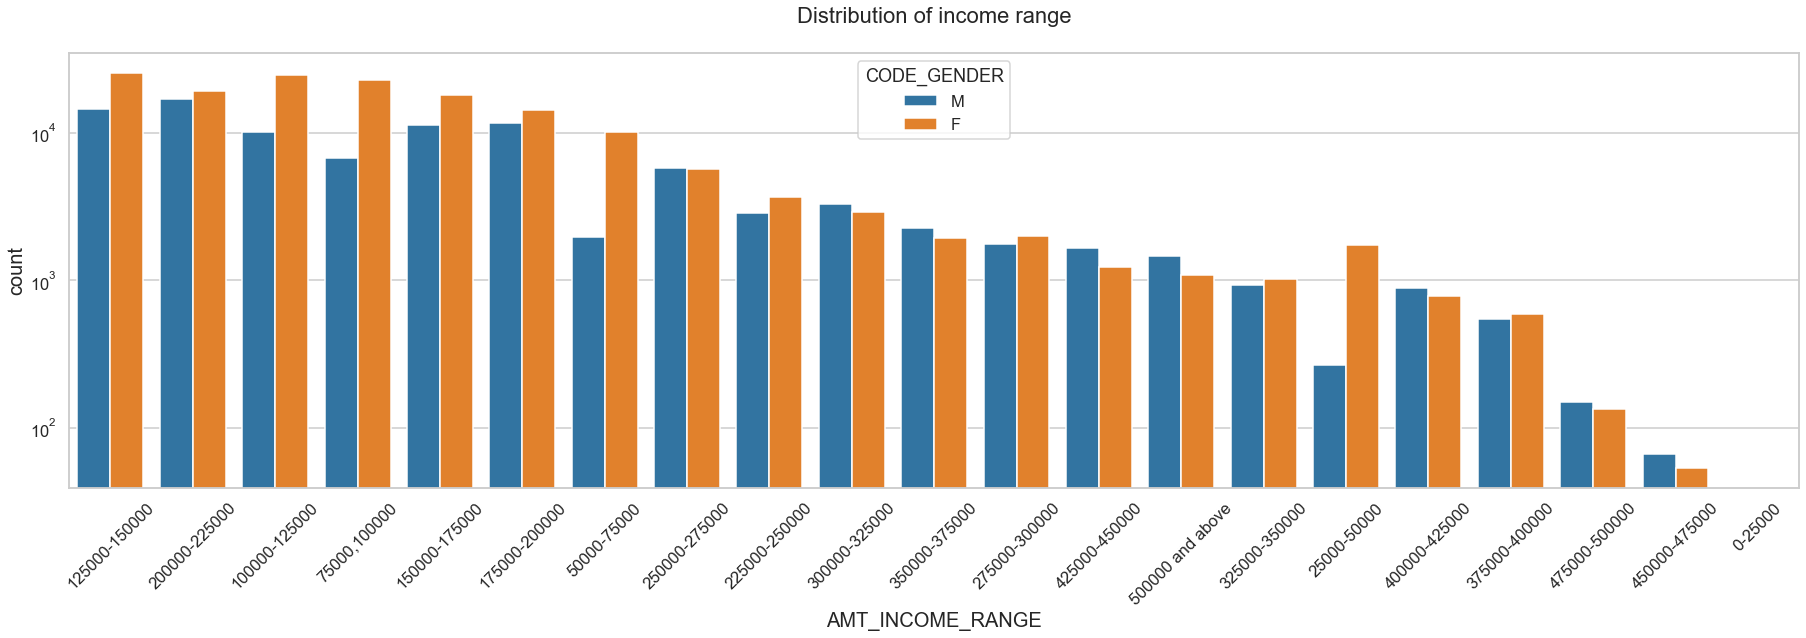

In [140]:
# PLotting for income range target 0

uniplot(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

### Points to be concluded from the above graph.
* Female counts are higher than male.
* Income range from 100000 to 200000 is having more number of credits.
* This graph show that females are more than male in having credits for that range.
* Very less count for income range 400000 and above.

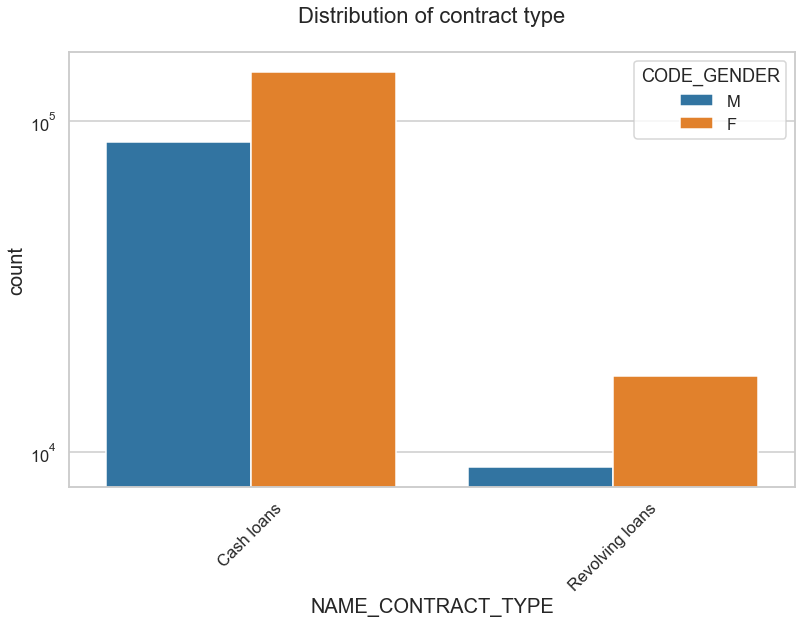

In [141]:
# Plotting for Contract type

uniplot(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

**Points to be concluded from the above graph.**

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. The majority number of Females are applying for credits than Males.

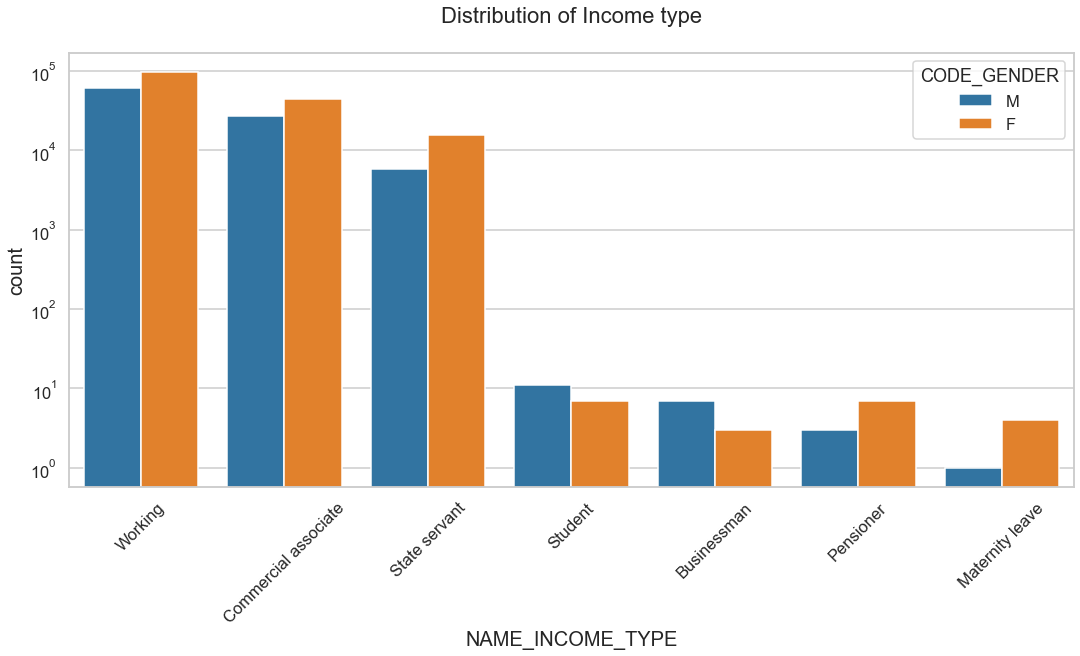

In [142]:
# Plotting for Income type

uniplot(target0,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

**Points to be concluded from the above graph.**

1. Income type ‘working’, ’commercial associate’, and ‘State Servant’ are higher number of credits than others.
2. Females are having more number of credits than male.
3. Less number of credits for income type are ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

**Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

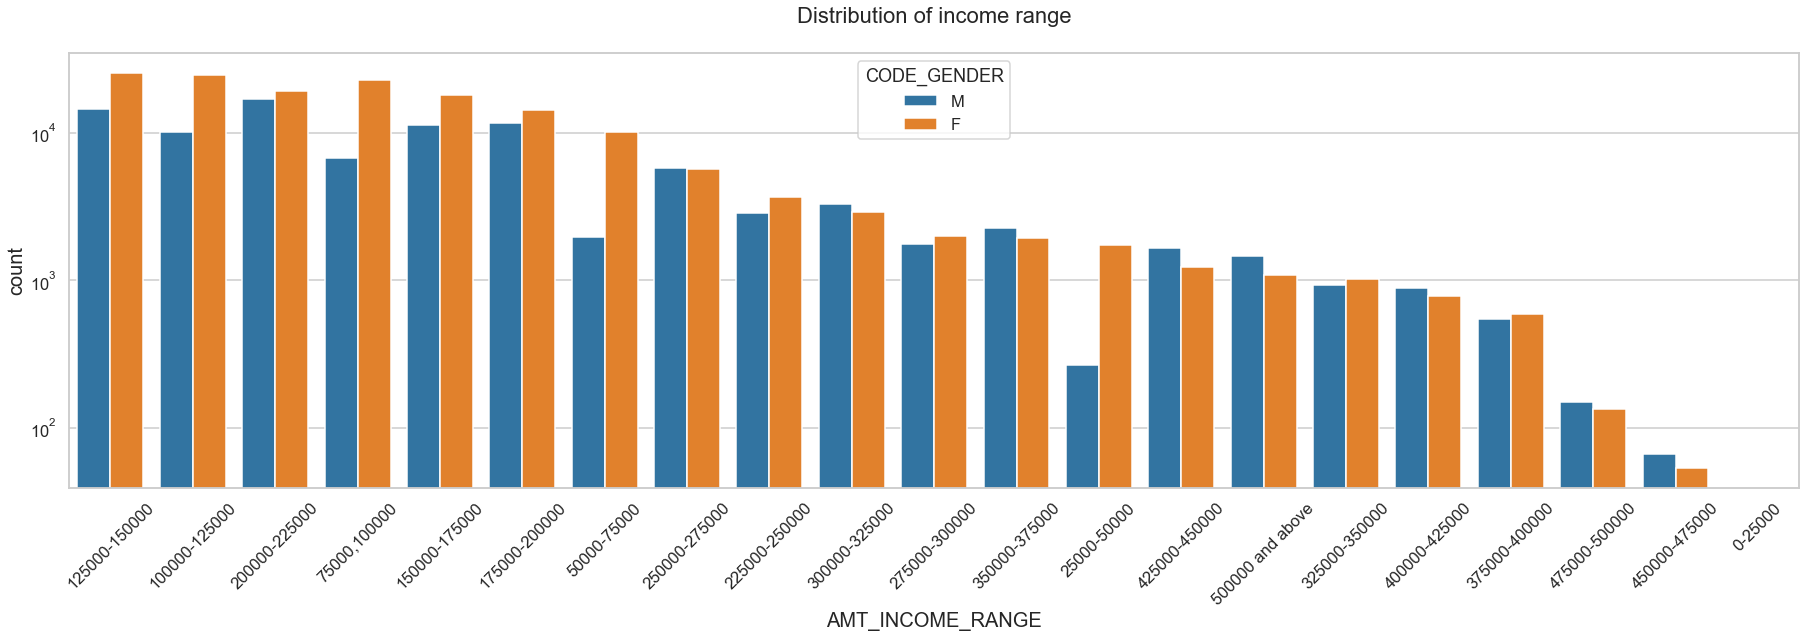

In [143]:
# PLotting for income range for target 1

uniplot(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

### Points to be concluded from the above graph.

* Male counts are higher than female.
* Income range from 100000 to 200000 is having more number of credits.
* This graph show that males are more than female in having credits for that range.
* Very less count for income range 400000 and above.

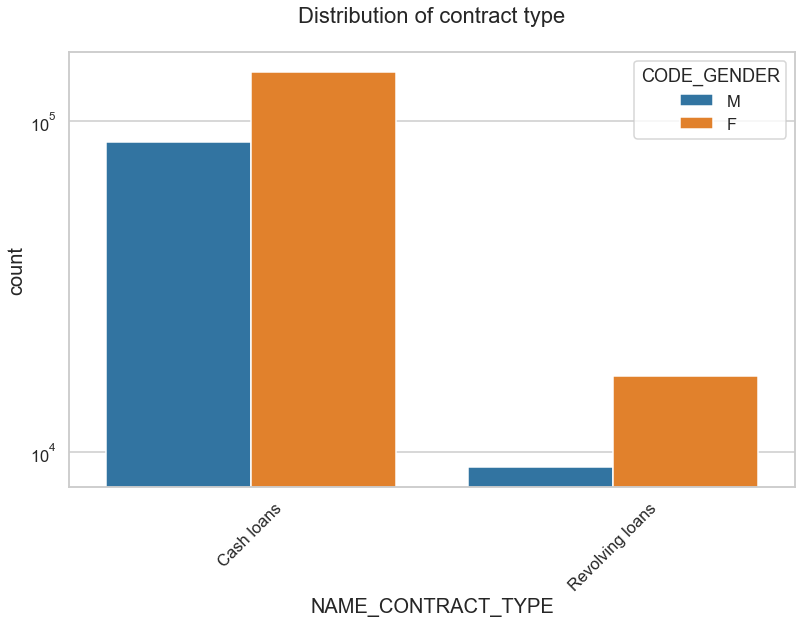

In [178]:
# Plotting for Contract type

uniplot(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. Cash loans is having higher number of credits than Revolving loans contract type.
2. Female are applying for credits more than Males.


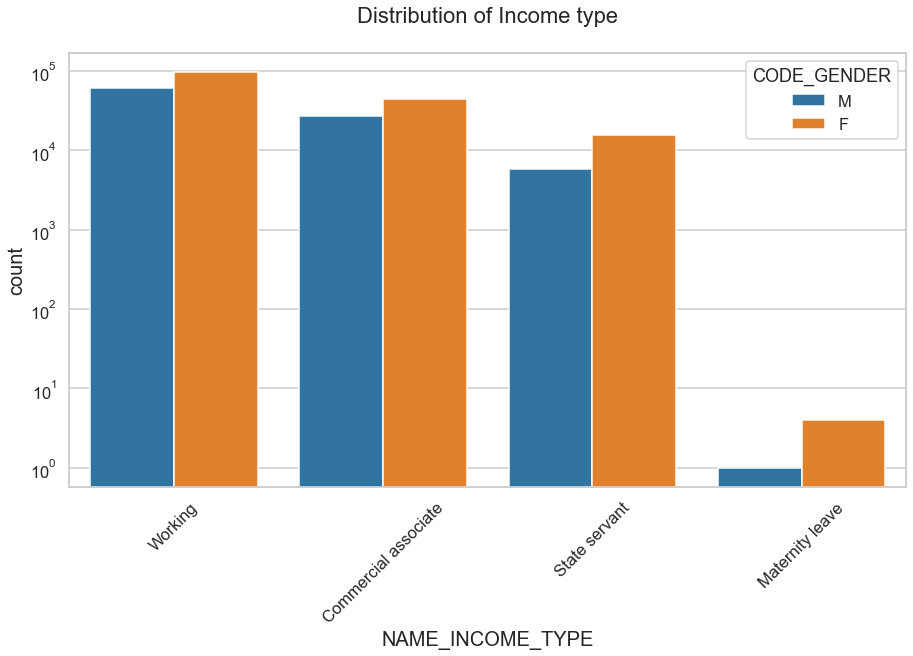

In [145]:
# Plotting for Income type

uniplot(target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave.
2. Females are having more number of credits than male.
3. Less number of credits for income type  ‘Maternity leave’.

### Finding some correlation for numerical columns for both target 0 and 1 by using Heat Map



In [146]:
target0_numerical= target0.select_dtypes(include =['Float64'])

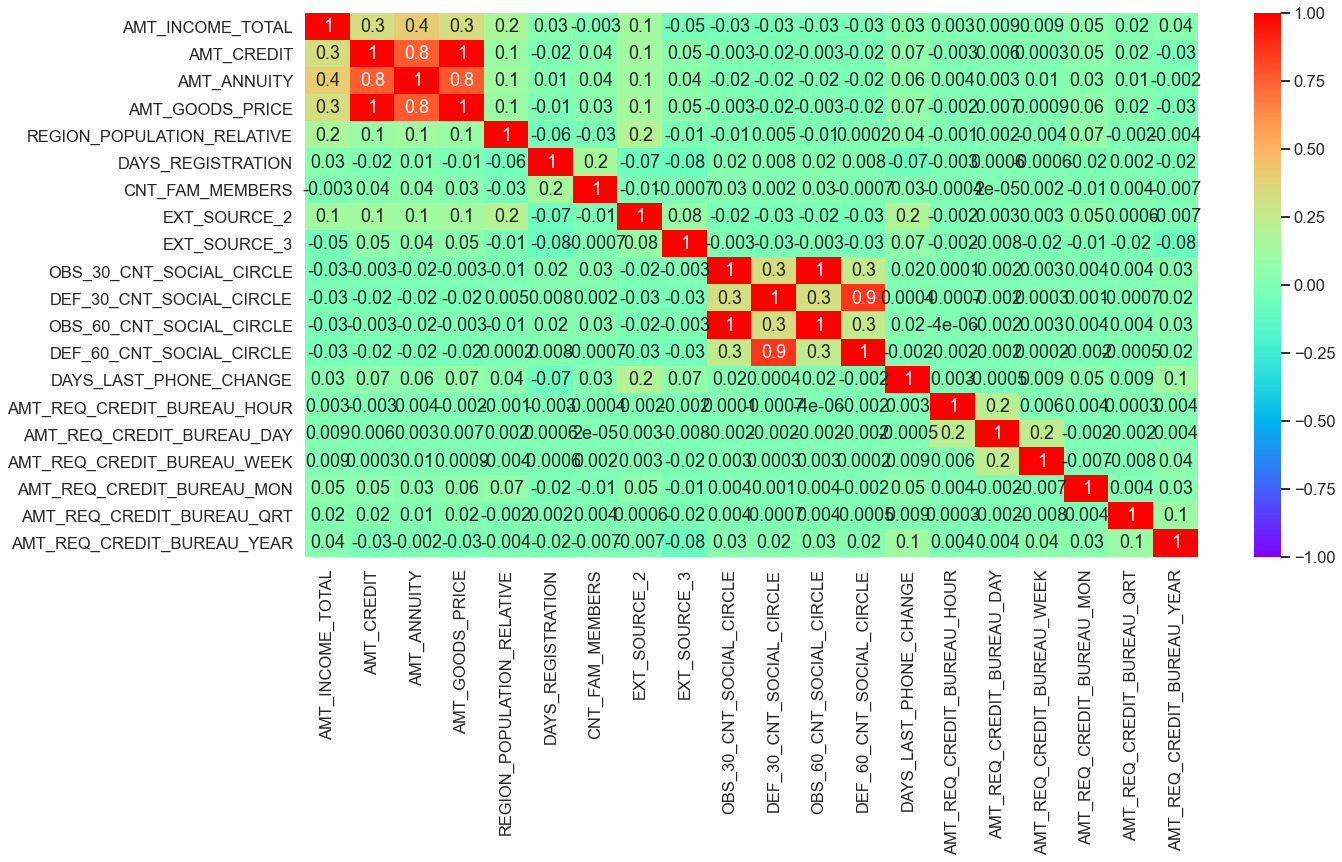

In [179]:
# Plotting (correlation matrix) heat map for target 0

plt.figure(figsize=(20,10))
corrMatrix = target0_numerical.corr()
sns.heatmap(corrMatrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,cmap='rainbow')
plt.show()

In [148]:
corrMatrix.round(2)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.00,0.33,0.40,0.33,0.17,0.03,-0.00,0.14,-0.05,-0.03,-0.03,-0.03,-0.03,0.03,0.00,0.01,0.01,0.05,0.02,0.04
AMT_CREDIT,0.33,1.00,0.76,0.99,0.10,-0.02,0.04,0.14,0.05,-0.00,-0.02,-0.00,-0.02,0.07,-0.00,0.01,0.00,0.05,0.02,-0.03
AMT_ANNUITY,0.40,0.76,1.00,0.77,0.12,0.01,0.04,0.13,0.04,-0.02,-0.02,-0.02,-0.02,0.06,0.00,0.00,0.01,0.03,0.01,-0.00
AMT_GOODS_PRICE,0.33,0.99,0.77,1.00,0.11,-0.01,0.03,0.14,0.05,-0.00,-0.02,-0.00,-0.02,0.07,-0.00,0.01,0.00,0.06,0.02,-0.03
REGION_POPULATION_RELATIVE,0.17,0.10,0.12,0.11,1.00,-0.06,-0.03,0.21,-0.01,-0.01,0.00,-0.01,0.00,0.04,-0.00,0.00,-0.00,0.07,-0.00,-0.00
DAYS_REGISTRATION,0.03,-0.02,0.01,-0.01,-0.06,1.00,0.16,-0.07,-0.08,0.02,0.01,0.02,0.01,-0.07,-0.00,0.00,-0.00,-0.02,0.00,-0.02
CNT_FAM_MEMBERS,-0.00,0.04,0.04,0.03,-0.03,0.16,1.00,-0.01,-0.00,0.03,0.00,0.03,-0.00,0.03,-0.00,0.00,0.00,-0.01,0.00,-0.01
EXT_SOURCE_2,0.14,0.14,0.13,0.14,0.21,-0.07,-0.01,1.00,0.08,-0.02,-0.03,-0.02,-0.03,0.19,-0.00,0.00,0.00,0.05,0.00,-0.01
EXT_SOURCE_3,-0.05,0.05,0.04,0.05,-0.01,-0.08,-0.00,0.08,1.00,-0.00,-0.03,-0.00,-0.03,0.07,-0.00,-0.01,-0.02,-0.01,-0.02,-0.08
OBS_30_CNT_SOCIAL_CIRCLE,-0.03,-0.00,-0.02,-0.00,-0.01,0.02,0.03,-0.02,-0.00,1.00,0.33,1.00,0.26,0.02,0.00,-0.00,0.00,0.00,0.00,0.03


In [149]:
target1_numerical= target1.select_dtypes(include ='float64')


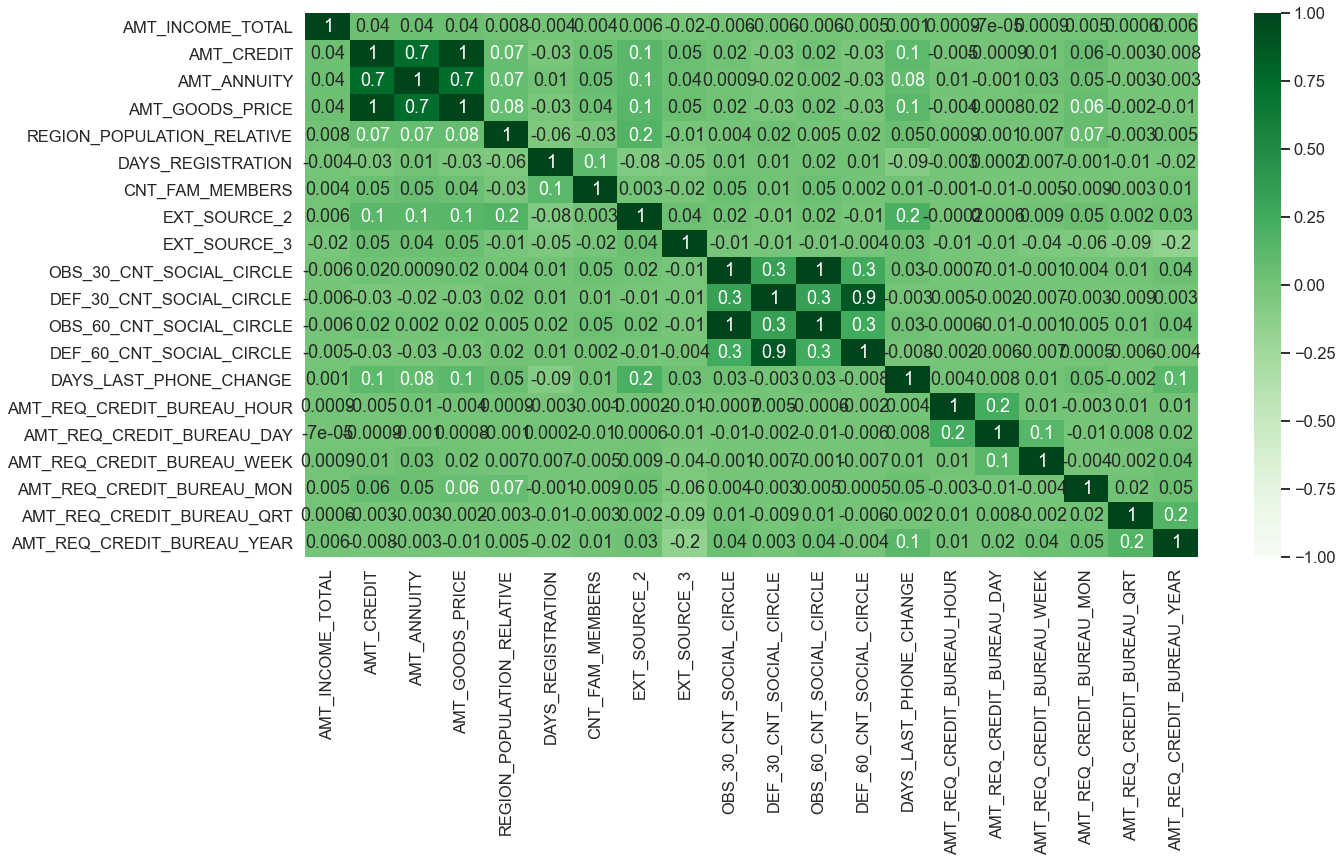

<Figure size 432x288 with 0 Axes>

In [150]:
# Plotting (correlation matrix) heat map for target 1
plt.figure(figsize=(20,10))
corrMatrix = target1_numerical.corr()
sns.heatmap(corrMatrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,cmap='Greens')
plt.show()
plt.tight_layout()

### checking Outliers 

In [151]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1, x=col,orient='v')
    plt.show()

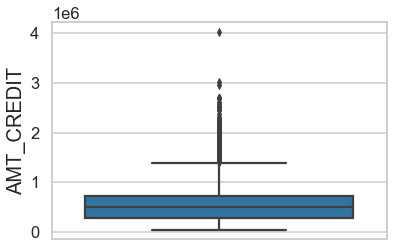

In [152]:
# Distribution of credit amount
sns.boxplot(data =target1, y='AMT_CREDIT',orient='v')

plt.show()

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.
2. The first quartile is smaller than third quartile for credit amount which means most of the credits of clients are present in the Third quartile.

<AxesSubplot:ylabel='AMT_GOODS_PRICE'>

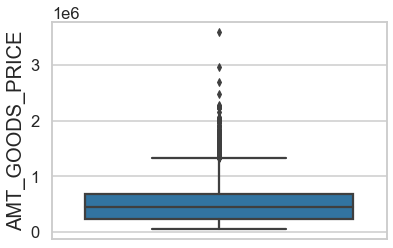

In [153]:
# Distribution of AMT_GOODS_PRICE

sns.boxplot(data =target1, y='AMT_GOODS_PRICE',orient='v')

Few points can be concluded from the graph above.

1.Some outliers are noticed in AMT_GOODS_PRICE.

2.The third quartile is bigger than first quartile for AMT_GOODS_PRICE

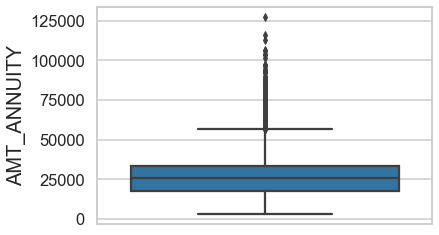

In [154]:
# Distribution of Annuity amount

sns.boxplot(data =target1, y='AMT_ANNUITY',orient='v')
plt.show()

Few points can be concluded from the graph above.

1. Some outliers are noticed in annuity amount.
2. The third quartile is bigger than first quartile for annuity amount which means most of the annuity clients are from third quartile.

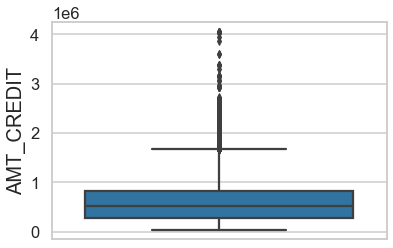

In [155]:
# Distribution of credit amount
sns.boxplot(data =target0, y='AMT_CREDIT',orient='v')

plt.show()

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.
2. The first quartile is smaller than third quartile for credit amount which means most of the credits of clients are present in the Third quartile.

<AxesSubplot:ylabel='AMT_GOODS_PRICE'>

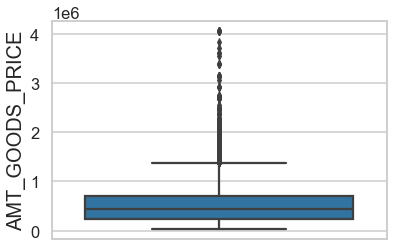

In [156]:
# Distribution of AMT_GOODS_PRICE

sns.boxplot(data =target0, y='AMT_GOODS_PRICE',orient='v')

Few points can be concluded from the graph above.

1. Some outliers are noticed in AMT_GOODS_PRICE.
2. The third quartile is bigger than first quartile for AMT_GOODS_PRICE

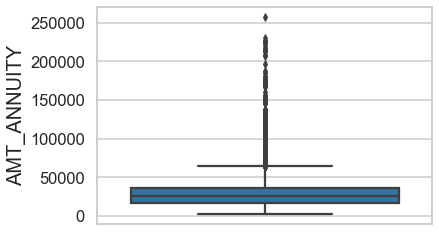

In [157]:
# Distribution of Annuity amount

sns.boxplot(data =target0, y='AMT_ANNUITY',orient='v')
plt.show()

Few points can be concluded from the graph above.

1. Some outliers are noticed in annuity amount.
2. The third quartile is bigger than first quartile for annuity amount which means most of the annuity clients are from third quartile.

### Bivariate analysis for numerical variables for target 0 and target 1

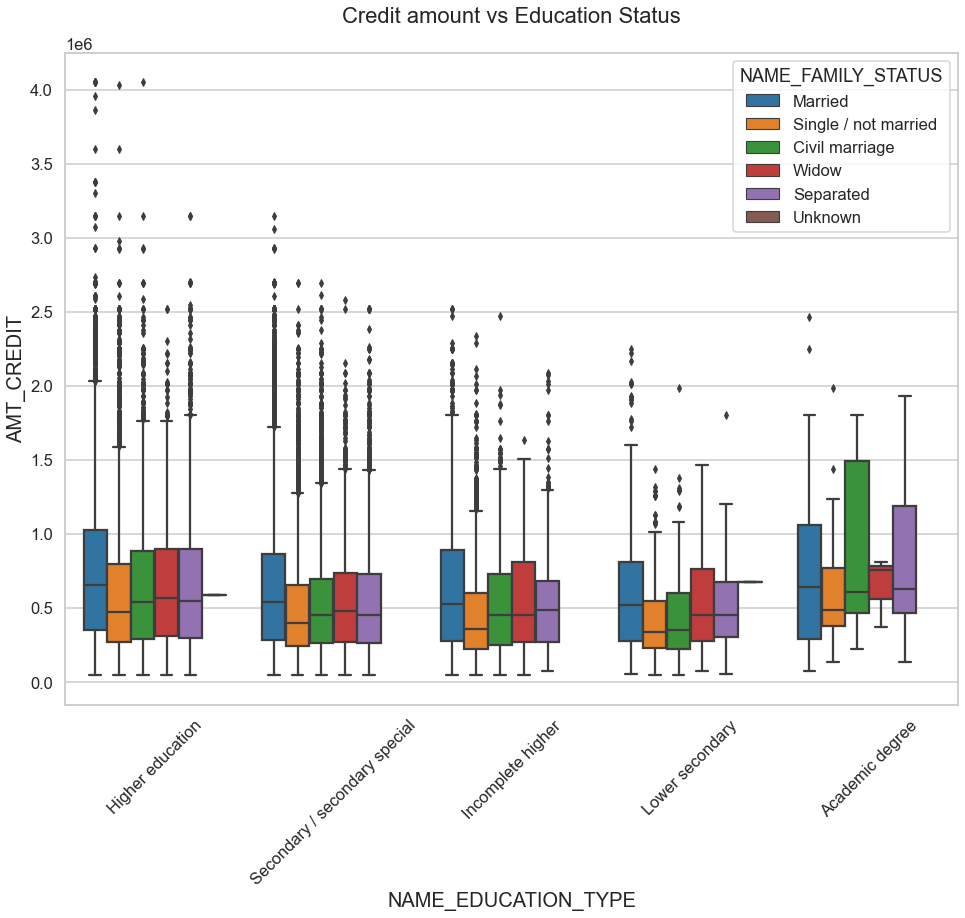

In [184]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

Observation:

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.

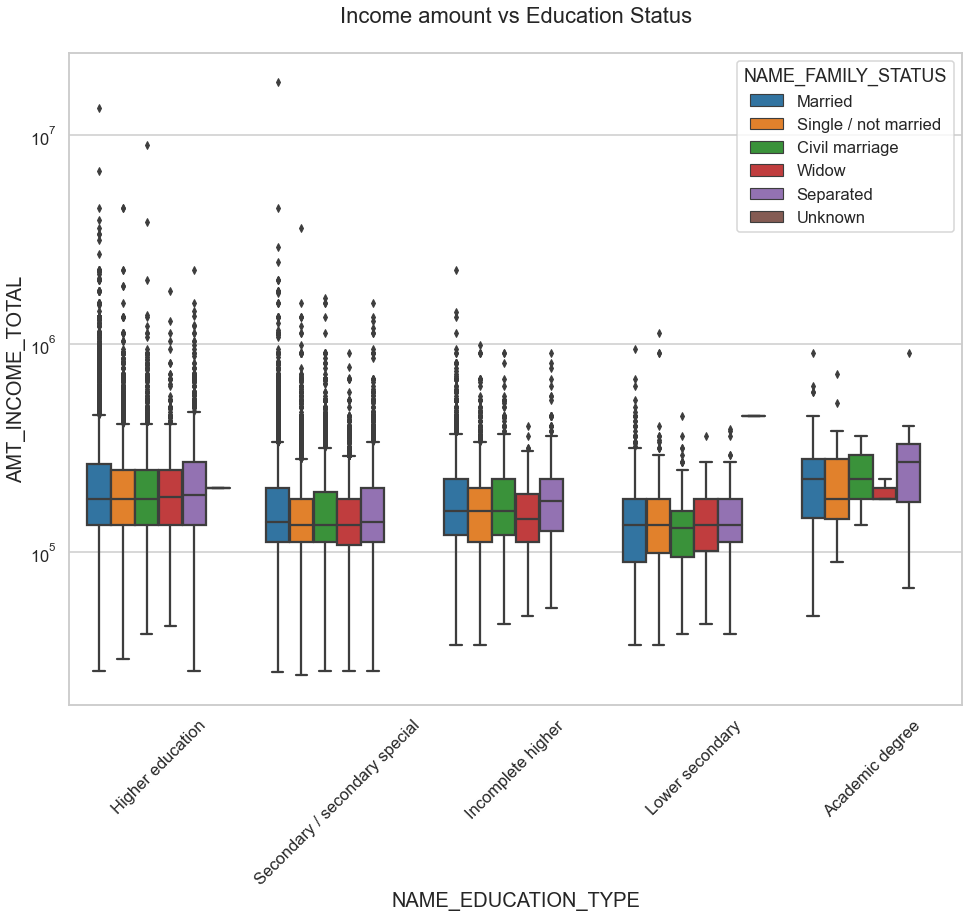

In [159]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

### For Target 1

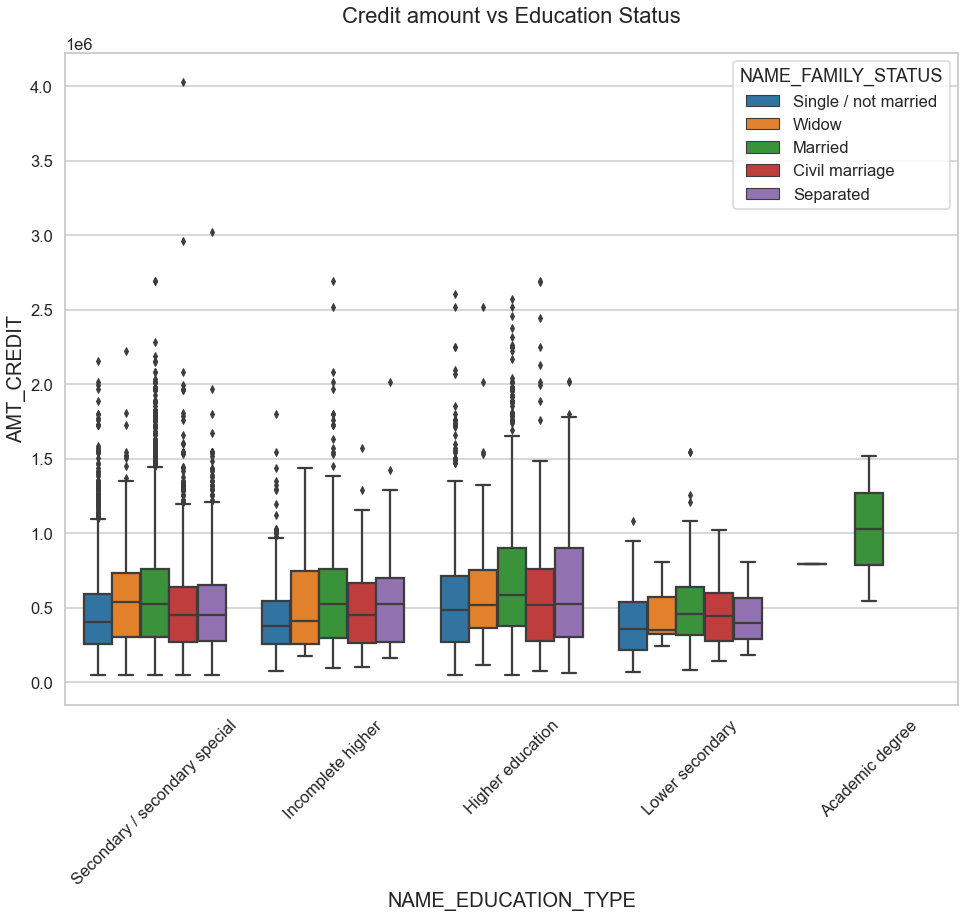

In [160]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

Quite similar with Target 0
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

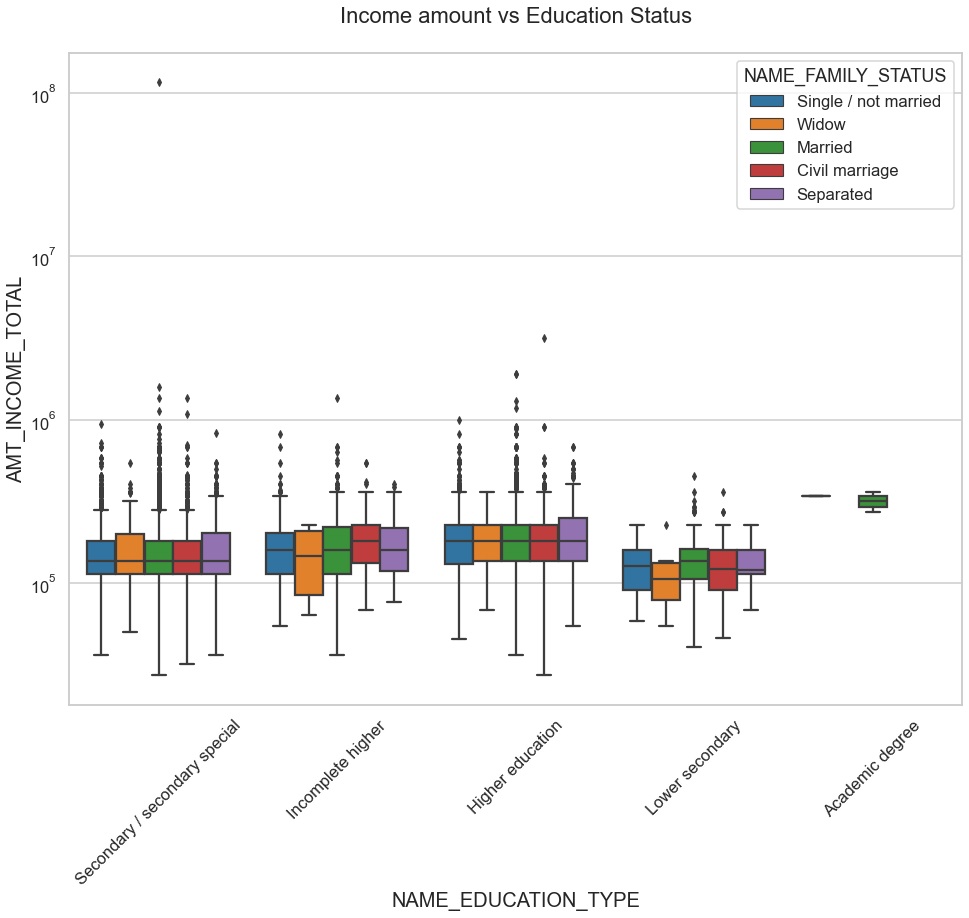

In [161]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0, From above boxplot for Education type 'Higher education' has more outliers when the income amount is going to high. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

### Current loan id having previous loan applications.
SK_ID_PREV - ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit).

SK_ID_CURR ID of loan in our sample.

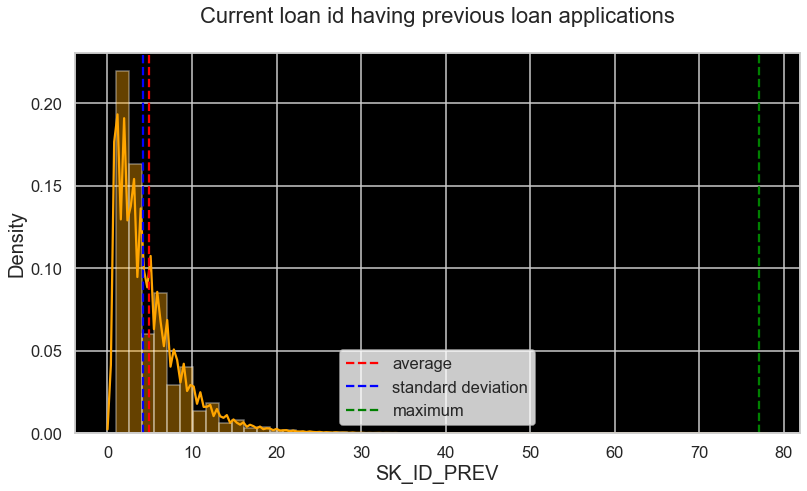

In [162]:
x = previous_application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")
ax.set_facecolor("k")

**Point to infer from the graph**

On average current loan ids have 4 to 5 loan applications previously

### Merging two datasets

In [163]:
# Now merging the Application dataset with previous appliaction dataset

pd.set_option("display.max_rows", None, "display.max_columns", None)
combined_df= pd.merge(application_data, previous_application, on='SK_ID_CURR', how='inner')

combined_df.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
display(combined_df.head(10))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apa

In [164]:
combined_df.shape

(1140118, 107)

### Top 10 Correlation Fields¶


In [165]:
corrmat = combined_df.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
2494,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
466,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99
5068,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.99
4991,AMT_CREDIT_y,AMT_APPLICATION,0.97
5069,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.97
1559,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.94
5849,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
1388,CNT_FAM_MEMBERS,CNT_CHILDREN,0.90
1871,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87
2572,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86


### Distribution of client owning a car and by gender¶
FLAG_OWN_CAR Flag if the client owns a car .

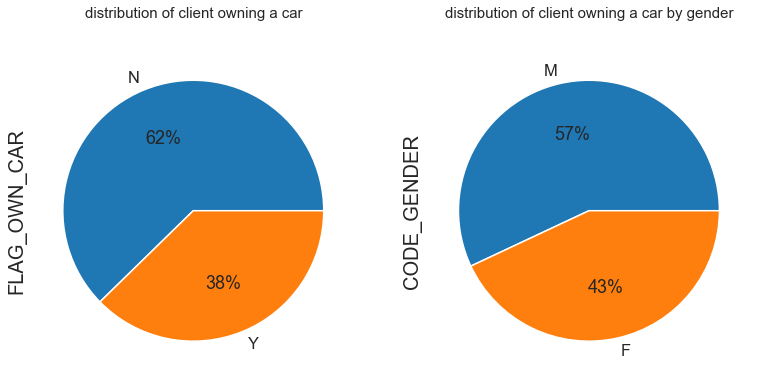

In [166]:
plt.figure(figsize=(13,6))

plt.subplot(121)
combined_df["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("distribution of client owning a car",fontsize= 15)

plt.subplot(122)
combined_df[combined_df["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("distribution of client owning a car by gender",fontsize= 15)

plt.show()


**Point to infer from the graph**

SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .

SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.



### Distribution of client owning a house or flat and by gender¶
FLAG_OWN_REALTY - Flag if client owns a house or flat



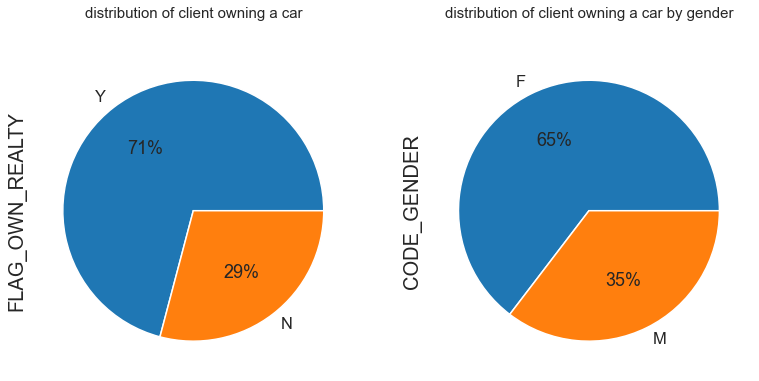

In [167]:
plt.figure(figsize=(13,6))

plt.subplot(121)
combined_df["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("distribution of client owning a car",fontsize= 15)

plt.subplot(122)
combined_df[combined_df["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("distribution of client owning a car by gender",fontsize= 15)

plt.show()


**Point to infer from the graph**

SUBPLOT 1 : Distribution of client owning a house or flat . 71% of clients own a flat or house .

SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

### Distribution of Suite type
NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

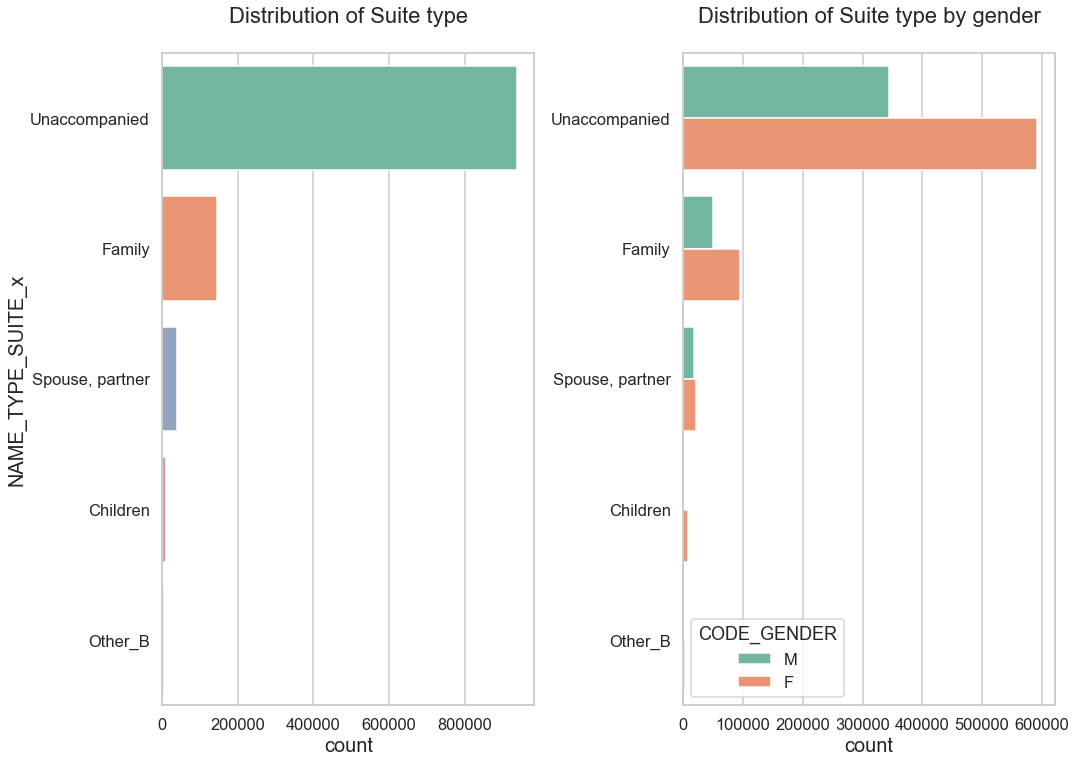

In [168]:
plt.figure(figsize=(16,12))
plt.subplot(121)
sns.countplot(y=combined_df["NAME_TYPE_SUITE_x"],
              palette="Set2",
              order=combined_df["NAME_TYPE_SUITE_x"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=combined_df["NAME_TYPE_SUITE_x"],
              hue=combined_df["CODE_GENDER"],palette="Set2",
              order=combined_df["NAME_TYPE_SUITE_x"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

**Point to infer from the graph**

SUBPLOT 1: High number of Unaccompained suite type are apllied for loan
    
SUBPLOT 2: Out of total clients high number of female clients more in every type of suite. more number of female clients from unaccompained suite.

### Distribution of Education type by loan repayment status
NAME_EDUCATION_TYPE Level of highest education the client achieved..

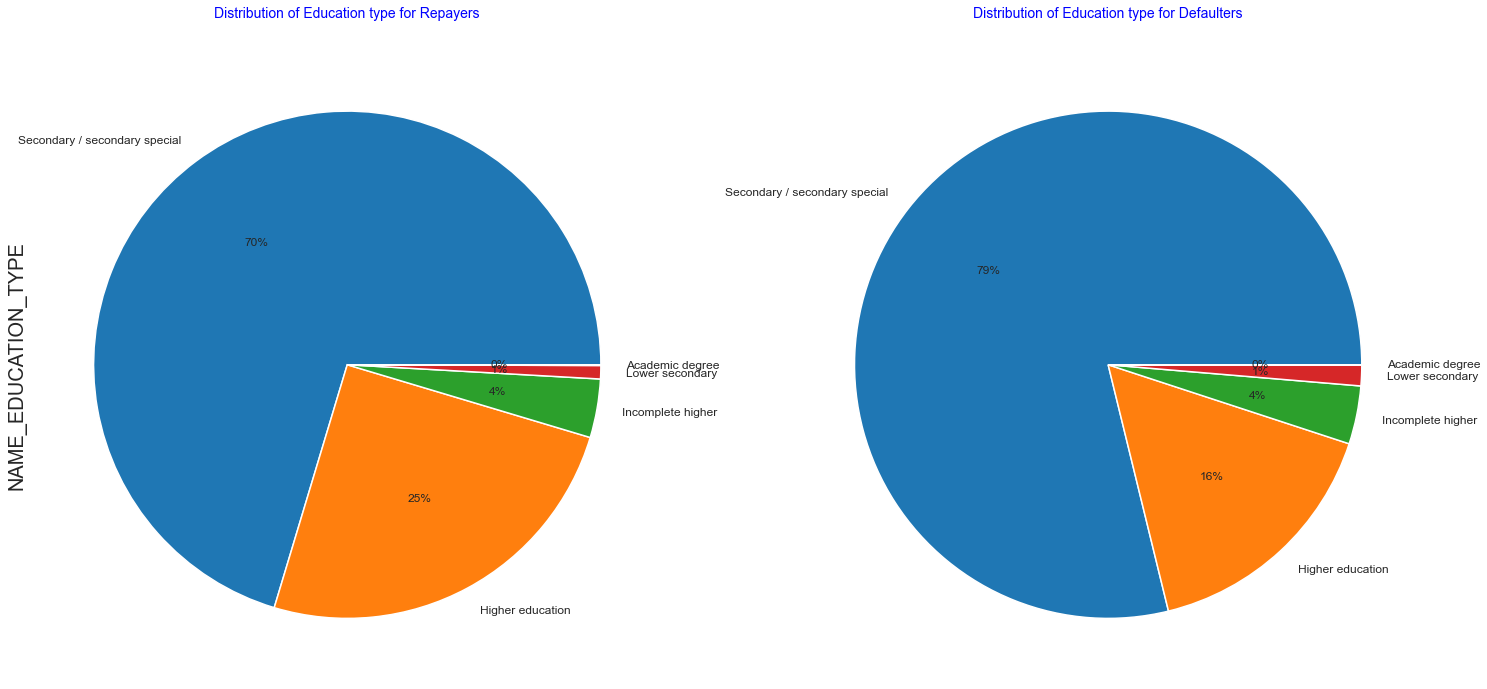

<Figure size 432x288 with 0 Axes>

In [169]:
# Distribution of Education type by loan repayment status
plt.figure(figsize=(25,25))

plt.subplot(121)
combined_df[combined_df["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%")
#plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b",fontsize=14)

plt.subplot(122)
combined_df[combined_df["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%")
#circ = plt.Circle((0,0),.7,color="white")
#plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b",fontsize=14)
plt.ylabel("")
plt.show()
plt.tight_layout()

****Point to infer from the graph¶**

1.Clients who default have proportionally 9%(79-70) less in  secondary education compared to clients who do not default

2.Clients who default have proportionally 9%(25-16) more in  higher education compared to clients who do not default

### Distribution normalized population of region where client lives by loan repayment status

REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region).

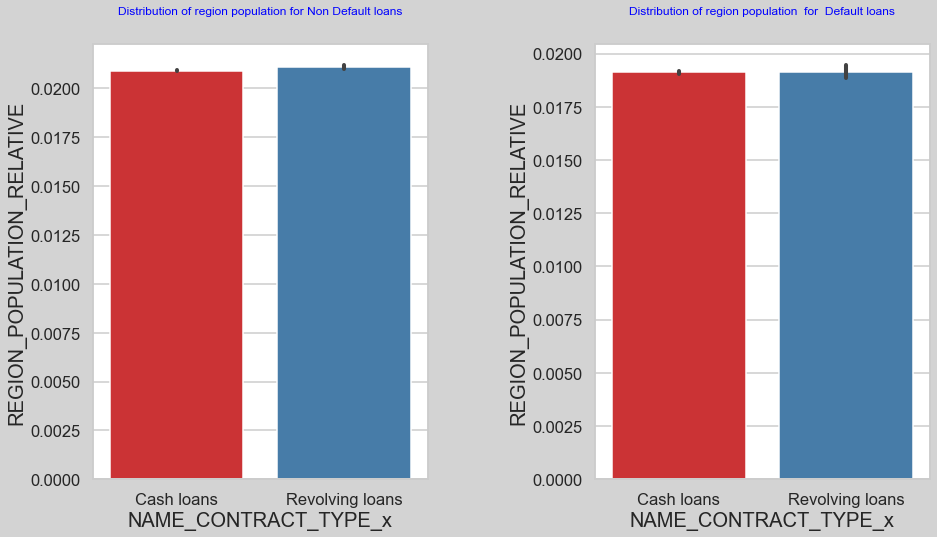

In [170]:
# Distribution normalized population of region where client lives by loan repayment status
fig = plt.figure(figsize=(15,8))

plt.subplot(121)
sns.barplot(y=combined_df[combined_df["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=combined_df[combined_df["TARGET"]==0]["NAME_CONTRACT_TYPE_x"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b",fontsize=12)
plt.subplot(122)
sns.barplot(y = combined_df[combined_df["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=combined_df[combined_df["TARGET"]==1]["NAME_CONTRACT_TYPE_x"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b",fontsize=12)

plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")

### Point to infer from the graph

In High population density regions people are less likely to default on loans.

### Percentage of applications accepted,cancelled,refused and unused for different loan purposes.¶
NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous applicatio

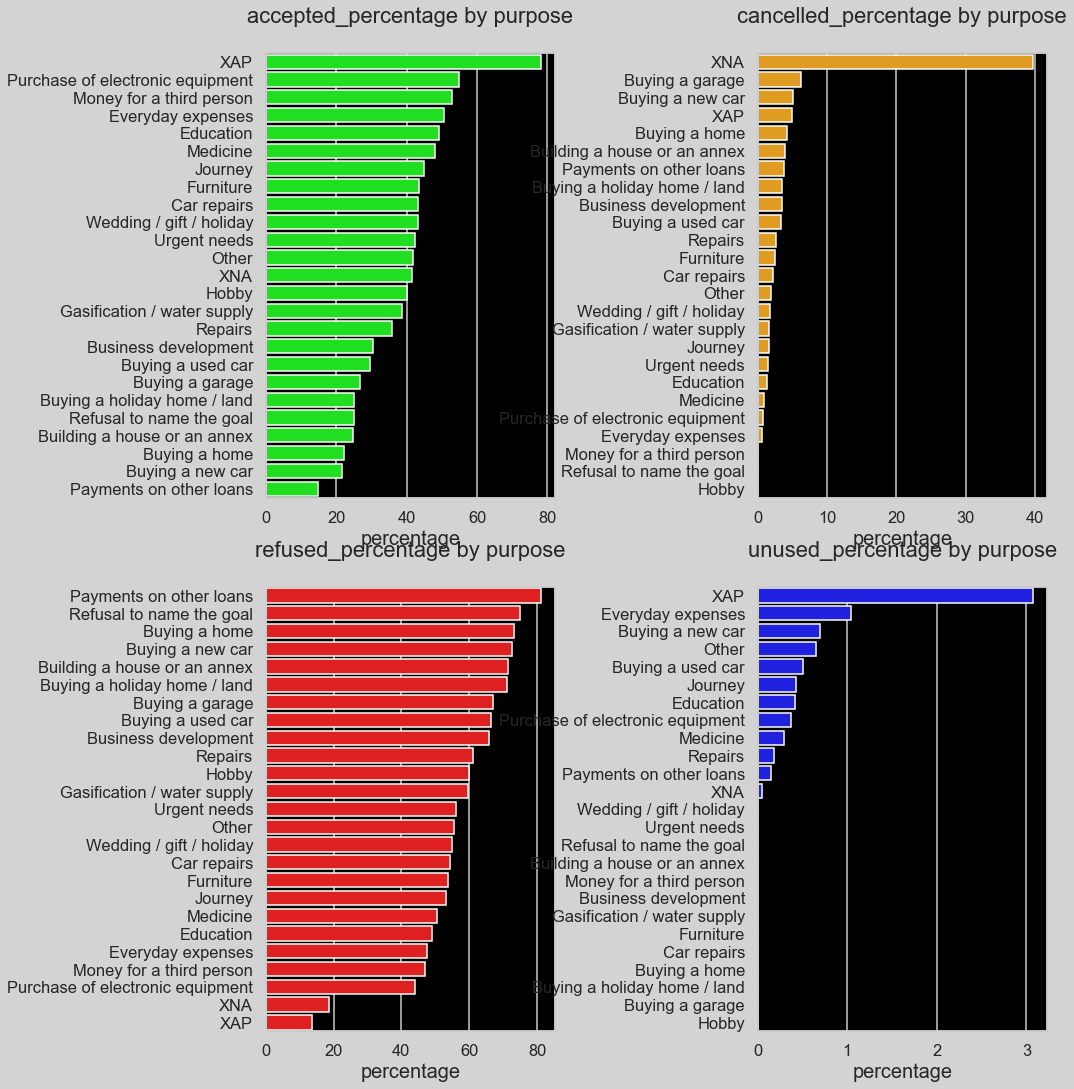

In [171]:
#Percentage of applications accepted,cancelled,refused and unused for different loan purposes.

import itertools

combined_df[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(combined_df["NAME_CASH_LOAN_PURPOSE"],combined_df["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)
    ax.set_facecolor("k")

**Point to infer from the graph**

Purposes like XAP ,electronic eqipment ,everey day expences and education have maximum loan acceptance.

Loan puposes like Hobby, payment of other loans ,refusal to name goal ,buying new home or car have most refusals.

37.5% of XNA purpose loans are cancalled.

### Client payment methods & reasons for application rejections
NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application.

CODE_REJECT_REASON - Why was the previous application rejected.

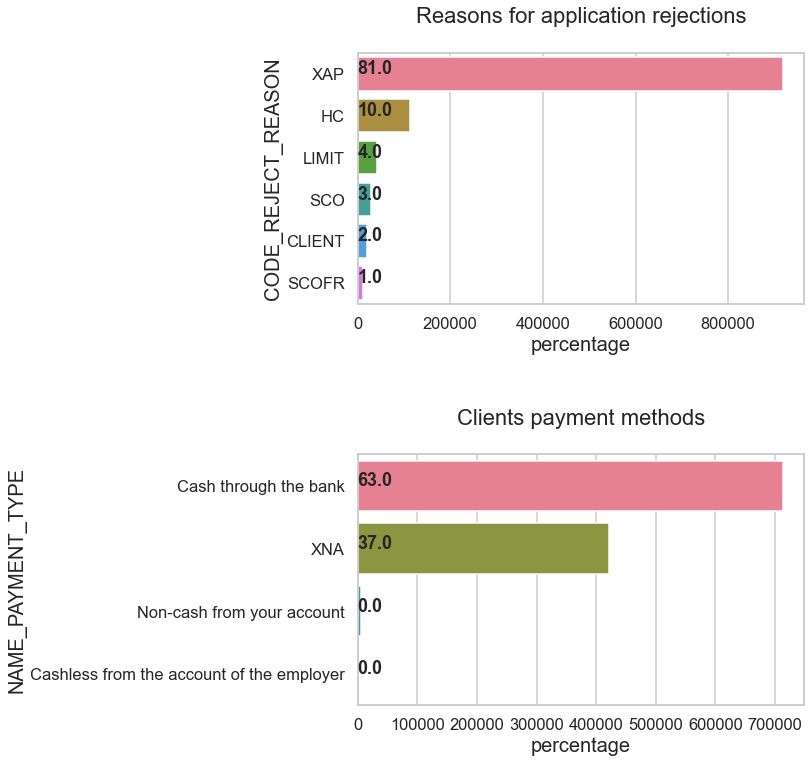

In [172]:
## Client payment methods & reasons for application rejections
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = combined_df["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.5,i,j,weight="bold")
plt.xlabel("percentage")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = combined_df["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.5,i,j,weight="bold")
plt.xlabel("percentage")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .6)

**Point to infer from the graph**

Around 81% of rejected applications the reason is XAP.

63% of chose to pay through cash by bank for previous applications

### Popular goods for applying loans
NAME_GOODS_CATEGORY - What kind of goods did the client apply for in the previous application.

Text(0.5, 1.0, 'popular goods for applying loans')

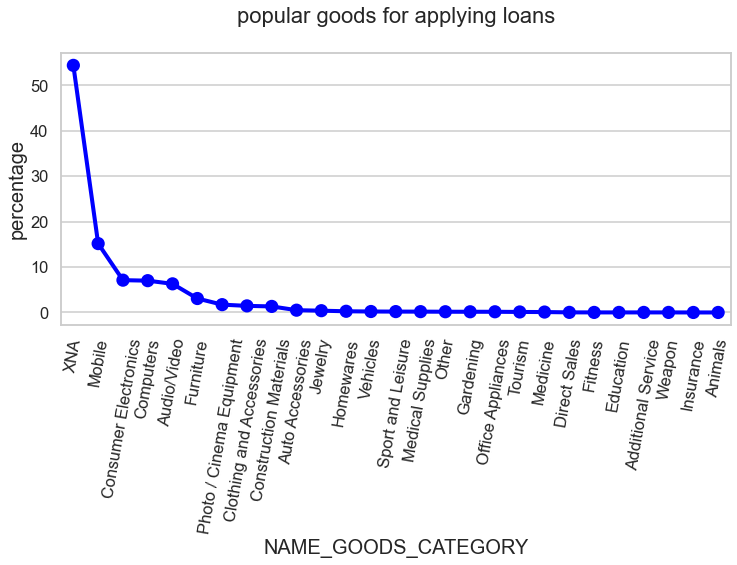

In [173]:
#Popular goods for applying loans

goods = combined_df["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="blue")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")


**Point to infer from the graph**

XNA ,Mobiles ,Computers and consumer electronics are popular goods for applying loans

### Approval,canceled and refusal rates by channel types.
CHANNEL_TYPE - Through which channel we acquired the client on the previous application.

NAME_CONTRACT_STATUS- Contract status (approved, cancelled, ...) of previous application.

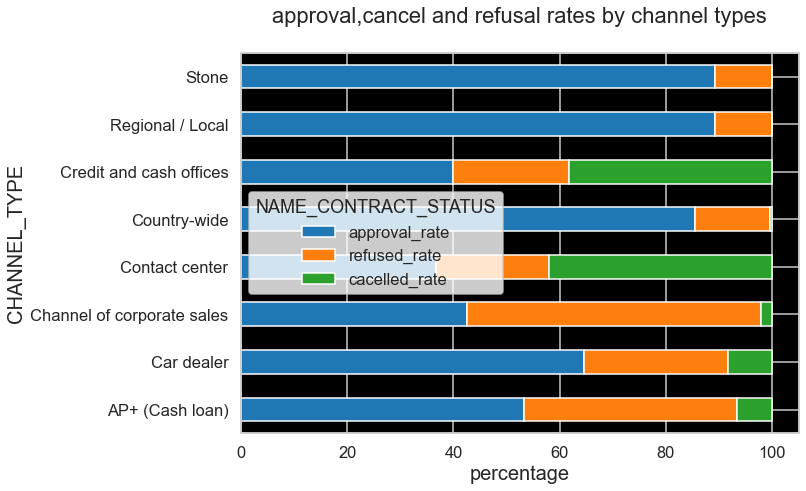

In [174]:
## Approval,canceled and refusal rates by channel types.

app = pd.crosstab(combined_df["CHANNEL_TYPE"],combined_df["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

**Point to infer from the graph**

Channel types like Stone ,regional and country-wide have maximum approval rates.

Channel of coorporate sales have maximum refusal rate.

Credit-cash centres and Contact centres have maximum cancellation rates.

### Top 10 Correlation Fields for Repayer

In [175]:
df_repayer = combined_df[combined_df['TARGET'] == 0]
df_defaulter = combined_df[combined_df['TARGET'] == 1]

In [176]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
2494,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
466,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99
5068,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.99
4991,AMT_CREDIT_y,AMT_APPLICATION,0.97
5069,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.97
1559,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.94
5849,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
1388,CNT_FAM_MEMBERS,CNT_CHILDREN,0.90
1871,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87
2572,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86


In [177]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
2494,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
5068,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.99
466,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.98
4991,AMT_CREDIT_y,AMT_APPLICATION,0.97
5069,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.97
1559,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
5849,DAYS_TERMINATION,DAYS_LAST_DUE,0.94
1388,CNT_FAM_MEMBERS,CNT_CHILDREN,0.90
5692,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.89
1871,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87


**Point of inference**

In Top 10 correlation fields of Repayer and defaulters, 9 of them are same fields. 

### CONCLUSION

1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
4. Banks should focus on Channel types like Stone ,regional and country-wide.
5. banks acan focus on High population density regions because the default rate is less in them.
6. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.